# *Offline Handwritten Text Recognition*

### The purpose of this notebook is to give a brief idea and a basic approach for offline handwritten text recognition by using segmentation and classification. 

## What is Offline Handwritten Text Recognition?
Offline handwriting recognition involves the automatic conversion of text in an image into letter codes that are usable within computer and text-processing applications. In simple terms, it is the text extraction from your handwritten notebooks/pages. Why called offline? The point being that there is an online text recognition system, which is referred for text that is digitally generated by using tools like stylus, apple pencil, etc.

## Approach

* **Step1** :  Build a digit(0-9) + A-Z characters classifier using a CNN architecture.
* **Step2** :  Apply character segmentation for the handwritten word image.
* **Step3** :  Classify each segmented letter and then get the final word in the image.

The "imutils" package provides a set of convenience functions to make basic image processing tasks easier in OpenCV, a popular library used for computer vision tasks in Python.

In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=3c83bd422b9d0cb0f420f30662dccf07ef5b73b70c21430862a6e71b59f2006f
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


1. `import numpy as np`: This line imports the numpy library and allows you to use its functions using the shorthand "np".

2. `import pandas as pd`: This line imports the pandas library and allows you to use its functions using the shorthand "pd".

3. `from keras.preprocessing.image import ImageDataGenerator`: This line imports the ImageDataGenerator class from the keras library, which is used for data augmentation and preprocessing of images for deep learning models.

4. `import os`: This line imports the os module, which provides functions for interacting with the operating system.

5. `import random`: This line imports the random module, which provides functions for generating random numbers and performing random selections.

6. `import cv2`: This line imports the OpenCV library, which is used for computer vision tasks such as image processing and object detection.

7. `import imutils`: This line imports the imutils library, which provides convenience functions for basic image processing tasks in OpenCV.

8. `import matplotlib.pyplot as plt`: This line imports the pyplot module from the matplotlib library, which is used for creating visualizations such as plots and graphs.

9. `import seaborn as sns`: This line imports the seaborn library, which is used for creating attractive and informative statistical graphics.

10. `from sklearn.preprocessing import LabelBinarizer`: This line imports the LabelBinarizer class from the sklearn library, which is used for converting categorical labels into binary vectors.

11. `from keras.utils import np_utils`: This line imports the np_utils module from the keras library, which is used for converting arrays into one-hot encoded vectors.

12. `from keras.models import Sequential`: This line imports the Sequential class from the keras library, which is used for creating sequential neural network models.

13. `from keras import optimizers`: This line imports the optimizers module from the keras library, which provides optimization algorithms for training neural networks.

14. `from keras import backend as K`: This line imports the backend module from the keras library and aliases it as "K", which allows access to backend-specific functionality.

15. `from keras.layers import Dense, Activation, Flatten, Dense, MaxPooling2D, Dropout`: This line imports various layers and activation functions from the keras library, which are building blocks for constructing neural network models.

16. `from keras.layers import Conv2D, MaxPooling2D, BatchNormalization`: This line imports convolutional, pooling, and batch normalization layers from the keras library, which are commonly used in convolutional neural network architectures.

Overall, this code imports various libraries and modules necessary for image processing, data manipulation, visualization, and deep learning tasks, providing a foundation for building and training neural network models.

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

dir = "../input/handwritten-characters/Train/": Sets the directory path where the training images are stored.

train_data = []: Initializes an empty list to store the training data.

img_size = 32: Sets the desired size (both width and height) for resizing the images.

non_chars = ["#","$","&","@"]: Specifies a list of characters that should be excluded from the training data.

Loops through each item (subdirectory) in the specified directory:

If the item is in the list of characters to exclude, it skips to the next iteration.
Otherwise, it counts the number of images processed and stops when it reaches 4000.
Reads each image file in the subdirectory, converts it to grayscale, resizes it to the specified size, and appends it to the train_data list along with its corresponding label (the name of the subdirectory).

In [3]:
dir = "../input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

`len(train_data)` returns the number of elements (image-label pairs) in the `train_data` list. In simpler terms, it tells you how many images with their corresponding labels are present in the training dataset.

In [4]:
len(train_data)

140000

val_dir = "../input/handwritten-characters/Validation/": Sets the directory path where the validation images are stored.

val_data = []: Initializes an empty list to store the validation data.

img_size = 32: Sets the desired size (both width and height) for resizing the images.

Loops through each item (subdirectory) in the specified validation directory:

If the item is in the list of characters to exclude, it skips to the next iteration.
Otherwise, it counts the number of images processed and stops when it reaches 1000.
Reads each image file in the subdirectory, converts it to grayscale, resizes it to the specified size, and appends it to the val_data list along with its corresponding label (the name of the subdirectory).

In [5]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [6]:
len(val_data)

15209

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

This code snippet is preparing the training data for training a machine learning model. Here's what it does:

1. `train_X = []` and `train_Y = []`: These lines initialize empty lists to store the features (images) and labels respectively.

2. Loops through each element (image-label pair) in the `train_data` list:
   - For each pair, it extracts the features (image) and label.
   - It appends the features (image) to the `train_X` list.
   - It appends the label to the `train_Y` list.

Overall, this code is separating the images and their corresponding labels from the `train_data` list, storing them separately for further processing or training a machine learning model.

In [8]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [9]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

This code is performing label binarization on the training and validation labels. Here's a simple explanation:

1. `LB = LabelBinarizer()`: Initializes a label binarizer object.

2. `train_Y = LB.fit_transform(train_Y)`: Converts the training labels from their original format (e.g., string labels) into binary vectors. Each label is represented as a vector where only one element is 1 (indicating the class) and all other elements are 0.

3. `val_Y = LB.fit_transform(val_Y)`: Similarly, converts the validation labels into binary vectors using the same label binarizer object.

Overall, this process prepares the labels for training and validation in a format suitable for machine learning models, particularly those that expect binary-encoded labels.

In [10]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

This code snippet is performing preprocessing on the training data. Here's a simplified explanation:

1. `train_X = np.array(train_X)/255.0`: Converts the list of training images (`train_X`) into a NumPy array and then divides each pixel value by 255.0. This step normalizes the pixel values to be between 0 and 1, which is a common practice in image processing tasks.

2. `train_X = train_X.reshape(-1,32,32,1)`: Reshapes the training images array into a 4D array with dimensions (-1, 32, 32, 1). This format is commonly used in convolutional neural networks (CNNs), where:
   - `-1` indicates that the size of that dimension should be inferred based on the other dimensions.
   - `32, 32` represents the width and height of each image (32x32 pixels).
   - `1` indicates that the images are grayscale (one channel). If they were RGB, it would be 3.

3. `train_Y = np.array(train_Y)`: Converts the list of training labels (`train_Y`) into a NumPy array, which is a standard format for labels in machine learning tasks.

Overall, these steps prepare the training data (images and labels) for training a machine learning model, particularly a CNN in this case.

In [11]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [12]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [13]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [14]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


This code defines a convolutional neural network (CNN) model using Keras' Sequential API. Here's a simple explanation:

1. `model = Sequential()`: Initializes a sequential model where layers are added sequentially.

2. `model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(32,32,1)))`: Adds a convolutional layer with 32 filters, each with a size of 3x3, using the ReLU activation function. The 'padding="same"' argument ensures that the output size is the same as the input size, and 'input_shape=(32,32,1)' specifies the input shape (32x32 pixels, 1 channel for grayscale).

3. `model.add(MaxPooling2D(pool_size=(2,2)))`: Adds a max pooling layer with a pool size of 2x2, which reduces the spatial dimensions of the input.

4. `model.add(Conv2D(64, (3, 3), activation='relu'))`: Adds another convolutional layer with 64 filters and a size of 3x3, using the ReLU activation function.

5. `model.add(MaxPooling2D(pool_size=(2,2)))`: Adds another max pooling layer to reduce spatial dimensions.

6. `model.add(Conv2D(128, (3, 3), activation='relu'))`: Adds another convolutional layer with 128 filters and a size of 3x3, using ReLU activation.

7. `model.add(MaxPooling2D(pool_size=(2,2)))`: Adds another max pooling layer to further reduce spatial dimensions.

8. `model.add(Dropout(0.25))`: Adds dropout regularization to prevent overfitting by randomly dropping 25% of the neurons during training.

9. `model.add(Flatten())`: Flattens the output from the previous layer into a 1D array.

10. `model.add(Dense(128, activation='relu'))`: Adds a fully connected (dense) layer with 128 neurons and ReLU activation.

11. `model.add(Dropout(0.2))`: Adds another dropout layer with a dropout rate of 20%.

12. `model.add(Dense(35, activation='softmax'))`: Adds the output layer with 35 neurons (assuming it's a classification task with 35 classes) and softmax activation, which outputs probabilities for each class.

Overall, this model consists of multiple convolutional layers followed by max pooling for feature extraction, dropout layers for regularization, and dense layers for classification.

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

This code compiles the neural network model. Here's a simplified explanation:

1. `model.compile`: This method configures the model for training.

2. `loss='categorical_crossentropy'`: This specifies the loss function to measure how well the model performs on the training data. 'Categorical crossentropy' is commonly used for multi-class classification problems.

3. `optimizer="adam"`: This specifies the optimizer algorithm used to update the weights of the neural network during training. "Adam" is a popular optimization algorithm known for its efficiency.

4. `metrics=['accuracy']`: This specifies the evaluation metric to be used during training and testing. In this case, it's "accuracy", which measures the proportion of correctly classified images.

Overall, this line of code sets up the model for training with a specific loss function, optimizer, and evaluation metric.

In [17]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

This code trains the neural network model on the provided training data. Here's a simplified explanation:

1. `model.fit`: This method trains the model on the training data.

2. `train_X, train_Y`: These are the training features (images) and labels used for training the model.

3. `epochs=50`: This specifies the number of times the entire training dataset is passed forward and backward through the neural network. In this case, it's set to 50, meaning the model will be trained for 50 iterations.

4. `batch_size=32`: This specifies the number of training examples utilized in one iteration. It is common to use mini-batch training, where the training data is divided into small batches. Here, each batch contains 32 samples.

5. `validation_data = (val_X, val_Y)`: This provides validation data to evaluate the model's performance on data it hasn't seen during training. `val_X` and `val_Y` are the validation features (images) and labels.

6. `verbose=1`: This parameter controls the verbosity of the training process. A value of 1 means progress bars will be displayed during training.

Overall, this line of code trains the model on the training data for 50 epochs, using mini-batch training with a batch size of 32, and evaluates its performance on the validation data.

In [18]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.6268 - accuracy: 0.7997 - val_loss: 0.3056 - val_accuracy: 0.8991
Epoch 2/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.3525 - accuracy: 0.8807 - val_loss: 0.2659 - val_accuracy: 0.9151
Epoch 3/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.3040 - accuracy: 0.8963 - val_loss: 0.2508 - val_accuracy: 0.9129
Epoch 4/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2789 - accuracy: 0.9040 - val_loss: 0.2369 - val_accuracy: 0.9210
Epoch 5/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2606 - accuracy: 0.9100 - val_loss: 0.2442 - val_accuracy: 0.9180
Epoch 6/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2506 - accuracy: 0.9125 - val_loss: 0.2358 - val_accuracy: 0.9178
Epoch 7/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2393 - accuracy: 0.9158 - val_loss: 0.2273 - val_ac

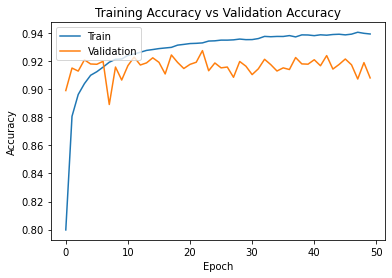

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

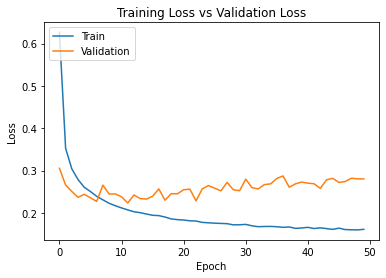

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

This code defines a function called `sort_contours` that sorts contours based on their spatial arrangement. Here's a simplified explanation:

1. The function takes two parameters: `cnts` (a list of contours) and `method` (a string specifying the sorting method).

2. It initializes a variable `reverse` as False and an index variable `i` as 0.

3. Based on the specified method, it adjusts the value of `reverse` and `i`.

4. It calculates the bounding boxes for each contour using `cv2.boundingRect`.

5. It sorts the contours and bounding boxes based on the specified method and returns the sorted lists.

Overall, this function sorts contours based on their spatial arrangement, allowing flexibility in sorting from left-to-right, right-to-left, top-to-bottom, or bottom-to-top.

In [21]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

This function, `get_letters(img)`, takes an image file path as input and performs the following operations:

1. Reads the image and converts it to grayscale.
2. Applies thresholding to obtain a binary image.
3. Dilates the binary image to enhance the contours.
4. Finds contours in the image.
5. Sorts the contours from left to right.
6. Loops over the contours:
   - If the contour area is greater than 10, it draws a rectangle around it.
   - Extracts the region of interest (ROI) from the grayscale image.
   - Applies thresholding to the ROI.
   - Resizes the thresholded image to 32x32 pixels.
   - Normalizes the pixel values and reshapes the image for model prediction.
   - Uses the trained model to predict the letter corresponding to the contour.
   - Appends the predicted letter to a list.
7. Returns the list of predicted letters and the original image with rectangles drawn around the contours.

Overall, this function identifies individual letters in the image, predicts their identities using a trained model, and returns the predicted letters along with the original image.

In [22]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

This function, `get_word(letter)`, takes a list of letters as input and concatenates them to form a word. Here's a simple explanation:

1. `"".join(letter)`: This line joins the individual letters in the input list into a single string, forming a word.

2. `return word`: This line returns the concatenated word as the output of the function.

Overall, this function simply combines the letters into a word and returns it.

In [23]:
def get_word(letter):
    word = "".join(letter)
    return word

BENE5


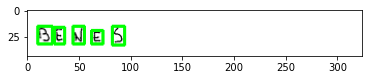

In [24]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

LIL0U


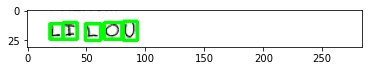

In [25]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

7AFFFLX


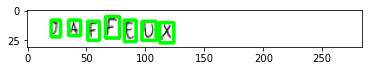

In [26]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

RUPP


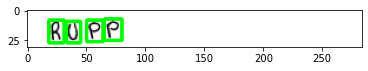

In [27]:
letter,image = get_letters("../input/handwriting-recognition/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

VALENTJNE


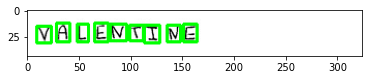

In [28]:
letter,image = get_letters("../input/handwriting-recognition/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

## Drawbacks
1. The recognition part is dependent on the contour detection code, so if the opencv library is not able to find the character contour, then this method will fail.
2. There could be a lot of variation in a single handwritten letter in terms of writing style, therefore a lot more examples are needed for training this model.
3. This model will not work for connected texts like a cursive handwritten word.

## References
1. [https://www.pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/](http://) 
2. [https://www.pyimagesearch.com/2015/04/20/sorting-contours-using-python-and-opencv/](http://)